<a href="https://colab.research.google.com/github/matusoff/Molecular-dynamics-with-BioPython/blob/main/Dihedral_angles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install Biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.6 MB/s eta 0:00:00


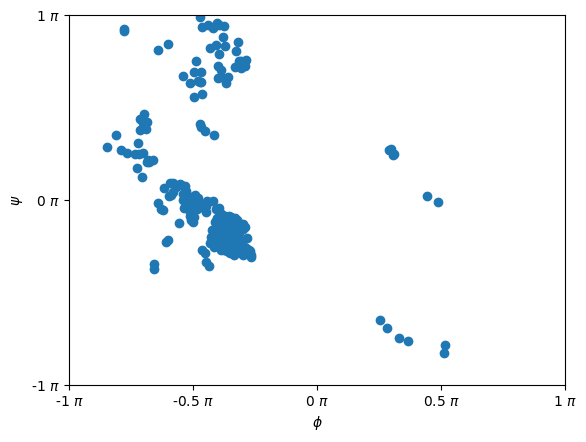

In [8]:
# Import Biopython, Matplotlib and NumPy libraries
import Bio.PDB
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np

# Import the Hemoglobin coordinates file from the Protein Data Bank.
structure = Bio.PDB.PDBParser(QUIET=True).get_structure('Hemoglobin', '/content/sample_data/1a3n.pdb')

# Define a function to build a model of the protein from the coordinates
def build_model(structure):
    angles = []
    for model in structure:
        for chain in model:
            polypeptides = Bio.PDB.CaPPBuilder().build_peptides(chain)
            for poly_index, poly in enumerate(polypeptides):
                phi_psi = poly.get_phi_psi_list()
                for res_index, residue in enumerate(poly):
                    phi, psi = phi_psi[res_index]
                    if phi and psi:
                        angles.append(['Hemoglobin', str(chain.id), residue.resname,
                                       residue.id[1], phi / np.pi, psi / np.pi])
    return np.array(angles)


# Run our function.
angles = build_model(structure)
phi = np.array(angles[:, 4], dtype='float')
psi = np.array(angles[:, 5], dtype='float')

# Plot the results
f, ax = plt.subplots(1)

ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
ax.yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.yaxis.set_major_locator(tck.MultipleLocator(base=1))
plt.ylim((-1, 1))
plt.xlim((-1, 1))
plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
ax.scatter(phi, psi)

plt.savefig("Islands.png", format="png")

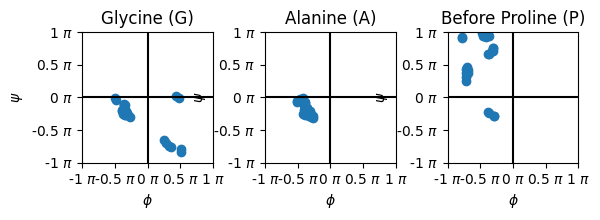

In [10]:
# Import the Hemoglobin coordinates file from the Protein Data Bank.
structure = Bio.PDB.PDBParser(QUIET=True).get_structure('Hemoglobin', '/content/sample_data/1a3n.pdb')

# Define a function to build a model of the protein from the coordinates.
def build_model(structure, resid, offset):
    angles = list()
    for model in structure:
        for chain in model:
            polypeptides = Bio.PDB.CaPPBuilder().build_peptides(chain)
            for poly_index, poly in enumerate(polypeptides):
                phi_psi = poly.get_phi_psi_list()
                for res_index, residue in enumerate(poly):
                    phi, psi = phi_psi[res_index]
                    if (phi and psi) and poly[res_index + offset].resname == resid:
                        angles.append(['Hemoglobin', str(chain.id), residue.resname,
                                       residue.id[1], phi / np.pi, psi / np.pi])
    return np.array(angles)


# Run our function.
angles_gly = build_model(structure, 'GLY', 0)
angles_ala = build_model(structure, 'ALA', 0)
angles_pre_pro = build_model(structure, 'PRO', 1)

# Plot the results

fig = plt.figure()
ax1 = plt.subplot(131, autoscale_on=False, aspect='equal', xlim=[-1, 1], ylim=[-1, 1])
plt.subplots_adjust(wspace=0.4)
ax1.scatter(angles_gly[:, 4].astype(float), angles_gly[:, 5].astype(float))
ax1.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax1.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
ax1.yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax1.yaxis.set_major_locator(tck.MultipleLocator(base=0.5))
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
plt.ylim((-1, 1))
plt.xlim((-1, 1))
plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
plt.title('Glycine (G)')

ax2 = plt.subplot(132, autoscale_on=False, aspect='equal', xlim=[-1, 1], ylim=[-1, 1])
ax2.scatter(angles_ala[:, 4].astype(float), angles_ala[:, 5].astype(float))
ax2.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax2.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
ax2.yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax2.yaxis.set_major_locator(tck.MultipleLocator(base=0.5))
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
plt.ylim((-1, 1))
plt.xlim((-1, 1))
plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
plt.title('Alanine (A)')

ax3 = plt.subplot(133, autoscale_on=False, aspect='equal', xlim=[-1, 1], ylim=[-1, 1])
ax3.scatter(angles_pre_pro[:, 4].astype(float), angles_pre_pro[:, 5].astype(float))
ax3.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax3.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
ax3.yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax3.yaxis.set_major_locator(tck.MultipleLocator(base=0.5))
ax3.axhline(y=0, color='k')
ax3.axvline(x=0, color='k')
plt.ylim((-1, 1))
plt.xlim((-1, 1))
plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
plt.title('Before Proline (P)')

plt.savefig("Islands.png", format="png")